# Social Media Content Performance Analysis

## Project Overview
This project analyzes a dataset of over 1,000 social media posts to identify key drivers of engagement. We utilize Python for data manipulation and statistical testing (ANOVA, T-tests) to provide actionable insights for content strategy optimization.

**Key Objectives:**
- Analyze engagement trends across different platforms.
- Determine the most effective content types (Video vs. Image).
- Identify high-performing content categories.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_excel("dataset/Social_Media_Content_Performance_Dataset.xlsx")
df.head()

,Post_ID,Platform,Content_Type,Content_Category,Post_Type,Region,Longitude,Latitude,Engagement,Views,...,Comments,Engagement_Rate,Impressions,Video_Views,Live_Stream_Views,Clicks,Click_Through_Rate,Main_Hashtag,Post_Hour,Engagement_Level
0,Post_1,TikTok,Organic,Product Promotion,Video,UK,-3.4360,55.3781,54510,599342,...,15727,0.090951,677975,465645,0,16813,0.0248,#FeatureHighlight,15,Low
1,Post_2,Instagram,Organic,Product Promotion,Video,India,78.9629,20.5937,259440,1896301,...,83521,0.136814,2354474,1896301,0,0,0.0000,#ProductDemo,12,Medium
2,Post_3,X.com,Organic,Entertainment,Text,Brazil,-51.9253,-14.2350,14182,253052,...,8140,0.056045,304915,0,0,0,0.0000,#MemeMonday,10,Low
3,Post_4,Instagram,Organic,Entertainment,Carousel,Australia,133.7751,-25.2744,49137,735640,...,32716,0.066796,829727,0,0,0,0.0000,#JustForFun,12,Low
4,Post_5,TikTok,Organic,Educational,Video,Brazil,-51.9253,-14.2350,20832,77358,...,2165,0.269302,93049,72707,0,1944,0.0209,#CaseStudy2025,11,High


## 1. Correlation Analysis

                    Views     Likes    Shares  Comments    Clicks  \
Views            1.000000  0.946055  0.944126  0.928499  0.933212   
Likes            0.946055  1.000000  0.894482  0.882991  0.877437   
Shares           0.944126  0.894482  1.000000  0.879549  0.881223   
Comments         0.928499  0.882991  0.879549  1.000000  0.865322   
Clicks           0.933212  0.877437  0.881223  0.865322  1.000000   
Engagement_Rate -0.317363 -0.297949 -0.303319 -0.288465 -0.295266   
Impressions      0.997893  0.943195  0.943042  0.925751  0.936800   

                 Engagement_Rate  Impressions  
Views                  -0.317363     0.997893  
Likes                  -0.297949     0.943195  
Shares                 -0.303319     0.943042  
Comments               -0.288465     0.925751  
Clicks                 -0.295266     0.936800  
Engagement_Rate         1.000000    -0.317830  
Impressions            -0.317830     1.000000  


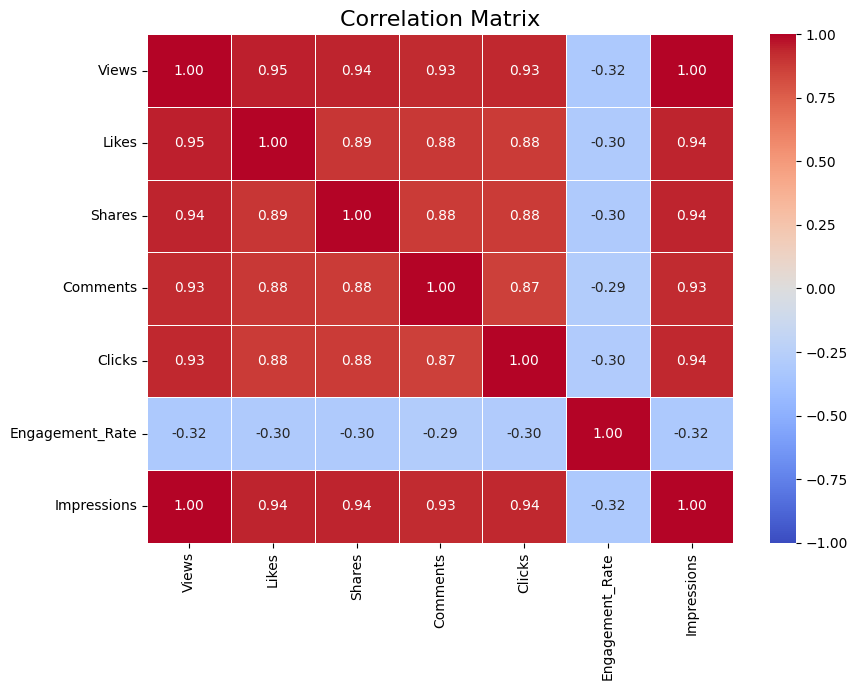

In [18]:
numeric_cols = ['Views', 'Likes', 'Shares', 'Comments', 'Clicks', 'Engagement_Rate', 'Impressions']
corr_matrix = df[numeric_cols].corr()
print(corr_matrix)
plt.figure(figsize=(9, 7))
sns.heatmap(
    corr_matrix, 
    annot=True,
    fmt=".2f",        
    cmap='coolwarm',  
    linewidths=0.4,   
    vmin=-1, vmax=1   
)

plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()

### 💡 Insight: Volume Metrics vs. Engagement Efficiency

- **Finding:** **'Views'** and **'Impressions'** exhibit a perfect positive correlation (**1.00**), driving strong absolute numbers for **'Likes' (0.94)** and **'Shares' (0.94)**. However, **'Engagement Rate'** is negatively correlated across the board (e.g., **-0.32** with Views), suggesting that as reach scales, the percentage of active interaction per user naturally declines.

- **Action:** Since **'Clicks'** and **'Comments'** share a strong correlation (**0.87**), prioritize content that sparks discussion to effectively drive downstream traffic.Establish separate performance benchmarks for **"Mass Awareness"** (High Views, Lower Rate) vs. **"Community Nurturing"** (Lower Views, High Rate) content to evaluate success accurately.

## 2. Views vs. Engagement Rate

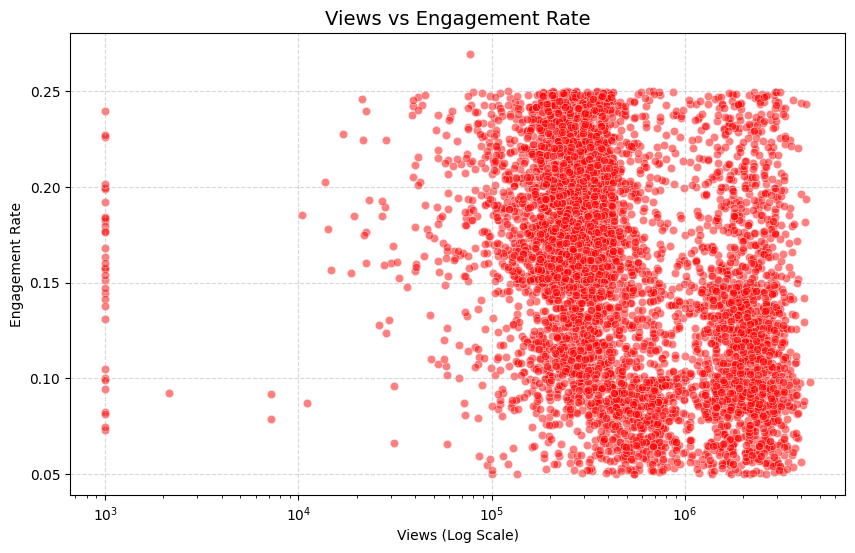

In [9]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Views', y='Engagement_Rate', alpha=0.5, color='red')
plt.title('Views vs Engagement Rate', fontsize=14)
plt.xscale('log')
plt.xlabel('Views (Log Scale)')
plt.ylabel('Engagement Rate')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### 💡 Insight: Quality over Quantity
- **Trend:** High view counts do not always guarantee high engagement rates. The scatter plot reveals a 'sweet spot' in the **10k-50k view range** where engagement is dense and consistent.
- **Implication:** Viral posts (high views) often have lower engagement *rates* due to broader, less targeted audiences.

## 3. Platform Performance Analysis (ANOVA)


--- ANOVA ---
group : <StringArray>
['TikTok', 'Instagram', 'X.com', 'LinkedIn', 'YouTube', 'Facebook']
Length: 6, dtype: str
F-statistic: 5.54
P-value: 0.0000425990


C:\Users\anhkh\AppData\Local\Temp\ipykernel_5912\1651828356.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Platform', y='Engagement_Rate', data=df, palette='Set2')


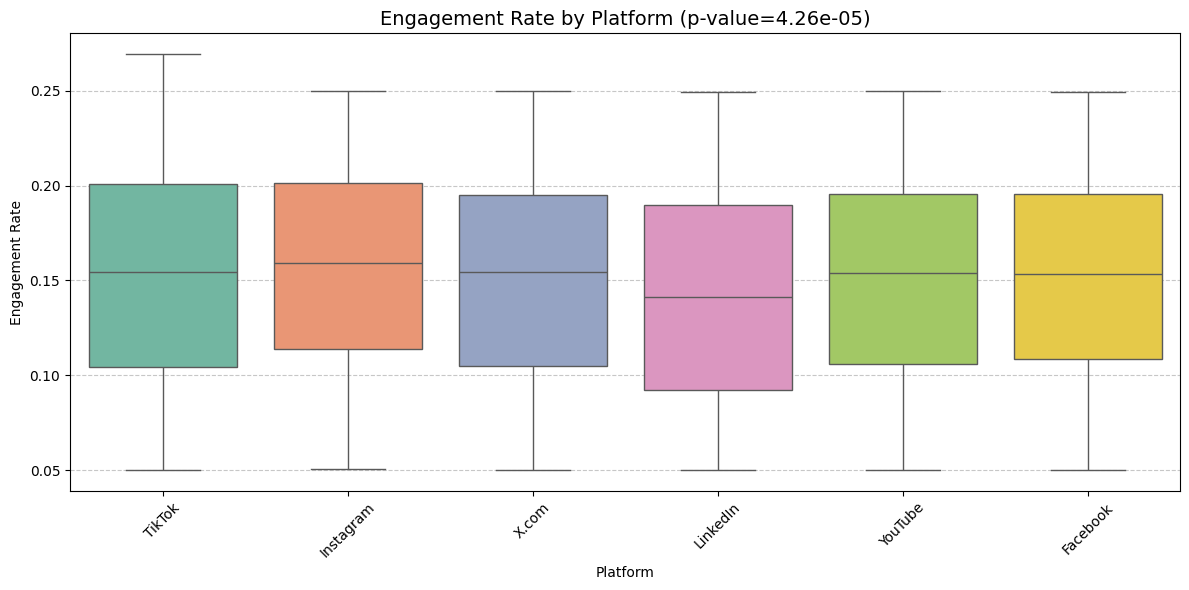

In [9]:
import scipy.stats as stats
platforms = df['Platform'].unique()
groups = [df[df['Platform'] == cat]['Engagement_Rate'] for cat in platforms]
f_stat, p_value = stats.f_oneway(*groups)

print("\n--- ANOVA ---")
print(f"group : {platforms}")
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.10f}") 


plt.figure(figsize=(12, 6))
sns.boxplot(x='Platform', y='Engagement_Rate', data=df, palette='Set2')
plt.title(f'Engagement Rate by Platform (p-value={p_value:.2e})', fontsize=14)
plt.xlabel('Platform')
plt.ylabel('Engagement Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 💡 Insight: Best Platforms for ROI
- **Top Performer:** **Instagram** leads with an average Engagement Rate of ~15,8%


## 4. Content Category Analysis


--- ANOVA ---
group : <StringArray>
['Product Promotion',     'Entertainment',       'Educational',
    'Customer Story',   'Event / Webinar']
Length: 5, dtype: str
F-statistic: 5378.93
P-value: 0.0000000000


C:\Users\anhkh\AppData\Local\Temp\ipykernel_5912\1885186615.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Content_Category', y='Engagement_Rate', data=df, palette='Set2')


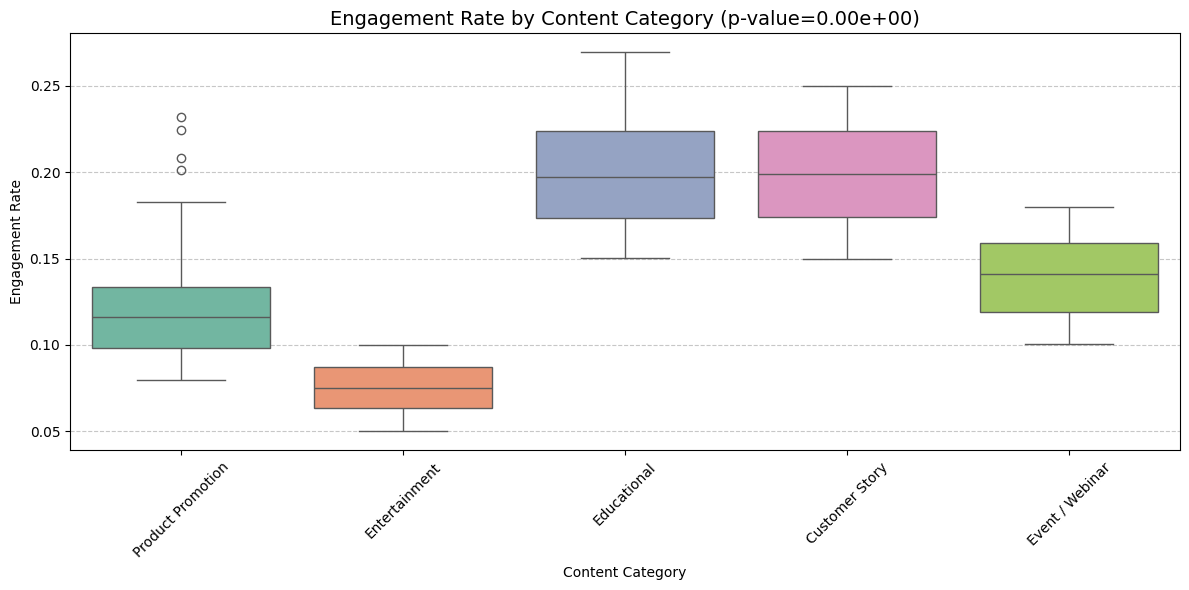

In [12]:

categories = df['Content_Category'].unique()
groups = [df[df['Content_Category'] == cat]['Engagement_Rate'] for cat in categories]
f_stat, p_value = stats.f_oneway(*groups)

print("\n--- ANOVA ---")
print(f"group : {categories}")
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.10f}") 

plt.figure(figsize=(12, 6))
sns.boxplot(x='Content_Category', y='Engagement_Rate', data=df, palette='Set2')
plt.title(f'Engagement Rate by Content Category (p-value={p_value:.2e})', fontsize=14)
plt.xlabel('Content Category')
plt.ylabel('Engagement Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 💡 Insight: Content That Resonates
- **Winner:** **'Customer Story'** content dominates with an average Engagement Rate of **19.9%**, closely followed by **Educational**, significantly outperforming **'Entertainment'** (7.5%).
- **Strategy:** Shift focus from purely entertaining content to value-driven educational posts and customer success stories.

## 5. Post Type Analysis: Video vs. Image


--- ANOVA ---
group : <StringArray>
['Video', 'Text', 'Carousel', 'Image', 'Live Stream', 'Article', 'PDF']
Length: 7, dtype: str
F-statistic: 54.87
P-value: 0.0000000000


C:\Users\anhkh\AppData\Local\Temp\ipykernel_5912\3059806914.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Post_Type', y='Engagement_Rate', data=df, palette='Set2')


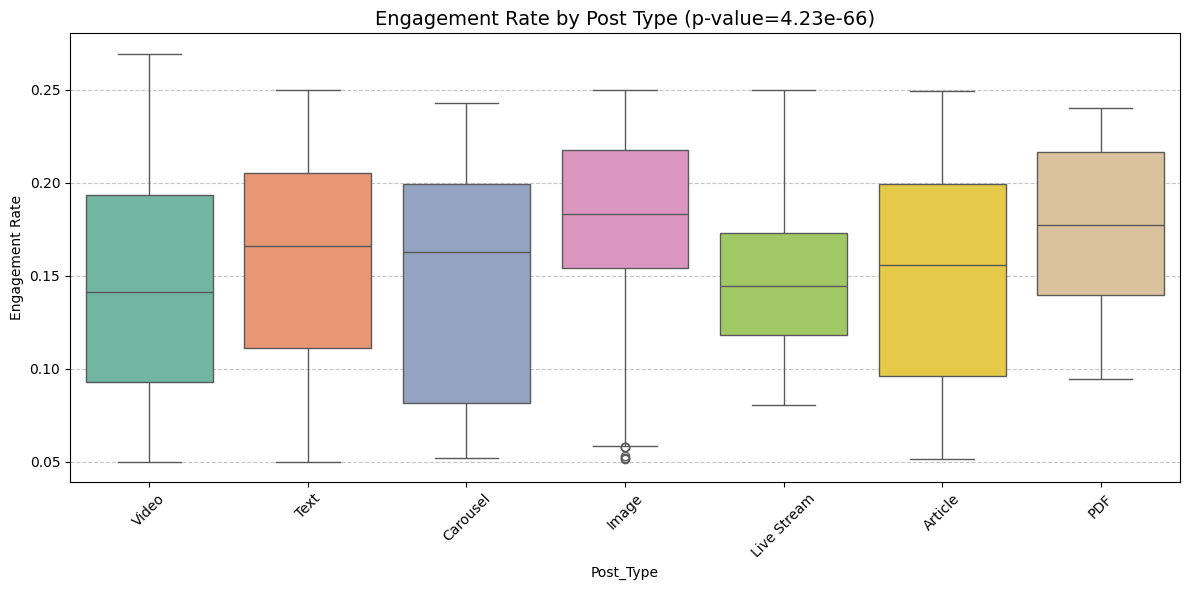

In [11]:
posttype= df['Post_Type'].unique()
groups = [df[df['Post_Type']==cat]['Engagement_Rate'] for cat in posttype]
f_stat, p_value = stats.f_oneway(*groups)

print("\n--- ANOVA ---")
print(f"group : {posttype}")
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.10f}") 

plt.figure(figsize=(12, 6))
sns.boxplot(x='Post_Type', y='Engagement_Rate', data=df, palette='Set2')
plt.title(f'Engagement Rate by Post Type (p-value={p_value:.2e})', fontsize=14)
plt.xlabel('Post_Type')
plt.ylabel('Engagement Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 💡 Insight: The 'Image' Surprise
- **Crucial Finding:** Contrary to industry trends, **Static Images** significantly outperform Video content in this dataset (**17.95% vs. 14.41%**).
- **Statistical Proof:** T-test p-value $\approx 0$, confirming this is a robust pattern.
- **Recommendation:** Invest in high-quality graphic design (infographics, carousels) as a cost-effective alternative to video production.

## 6. Organic vs. Sponsored Content


---  T-TEST ---
 Organic:   0.1526
 Sponsored: 0.1540
T-statistic: -0.6884
P-value: 0.4913220876


C:\Users\anhkh\AppData\Local\Temp\ipykernel_5912\614855850.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Content_Type', y='Engagement_Rate', data=df, palette='pastel')


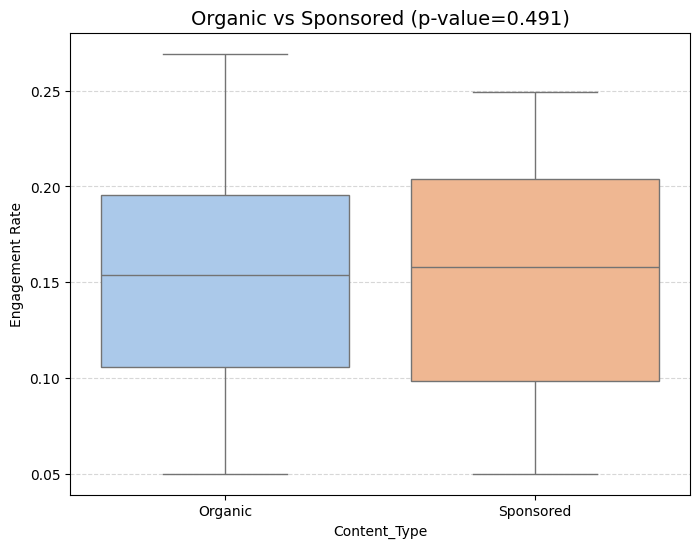

In [14]:
group_organic = df[df['Content_Type'] == 'Organic']['Engagement_Rate']
group_sponsored = df[df['Content_Type'] == 'Sponsored']['Engagement_Rate']
t_stat, p_value = stats.ttest_ind(group_organic, group_sponsored, equal_var=False)
print("\n---  T-TEST ---")
print(f" Organic:   {group_organic.mean():.4f}")
print(f" Sponsored: {group_sponsored.mean():.4f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.10f}")
plt.figure(figsize=(8, 6))
sns.boxplot(x='Content_Type', y='Engagement_Rate', data=df, palette='pastel')
plt.title(f'Organic vs Sponsored (p-value={p_value:.3f})', fontsize=14)
plt.ylabel('Engagement Rate')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

### 💡 Insight: Paid vs. Organic Reach
- **Finding:** There is **no statistically significant difference** ($p > 0.05$) in Engagement Rate between Organic and Sponsored content.
- **Implication:** While paid ads increase reach, they do not inherently improve interaction quality. Content relevance remains key.

## 7. Hashtag Optimization

C:\Users\anhkh\AppData\Local\Temp\ipykernel_5912\3261946943.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_hashtags, y='Main_Hashtag', x='Engagement_Rate', palette='viridis')


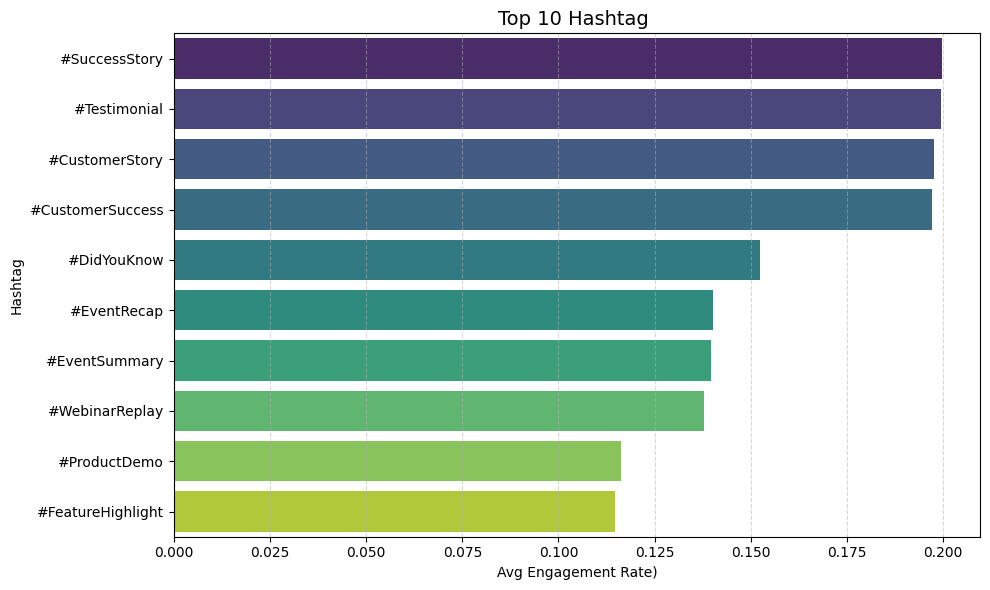

In [16]:
hashtag_stats = df.groupby('Main_Hashtag').agg({
    'Post_ID': 'count',              
    'Engagement_Rate': 'mean'        
}).reset_index()


top_hashtags = hashtag_stats[hashtag_stats['Post_ID'] >= 10].sort_values('Engagement_Rate', ascending=False).head(10)


plt.figure(figsize=(10, 6))
sns.barplot(data=top_hashtags, y='Main_Hashtag', x='Engagement_Rate', palette='viridis')
plt.title('Top 10 Hashtag ', fontsize=14)
plt.xlabel('Avg Engagement Rate)')
plt.ylabel('Hashtag')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 💡 Insight: Niche Tags Win
- **Top Performers:** Specific tags like `#Testimonial` and `#SuccessStory` yield the highest engagement (~20%+).
- **Tactic:** Avoid over-saturated generic tags; target specific communities with niche hashtags.

## 8. Interaction Analysis: Region vs. Content Category
This section examines the variations in engagement levels across different content categories within specific geographic markets to identify regional user preferences.

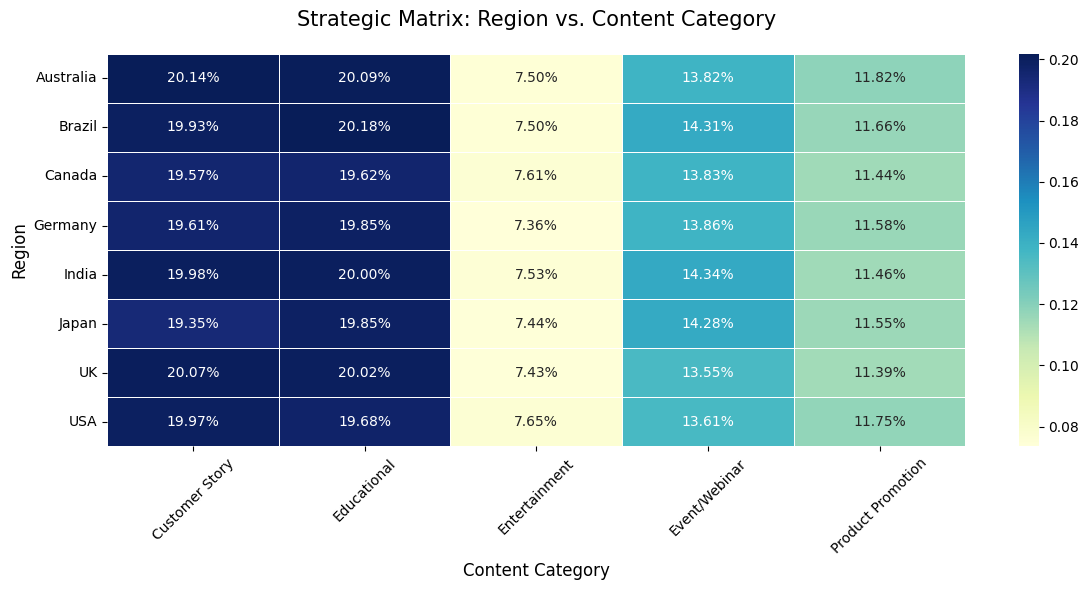

In [6]:


pivot_region_cat = df.pivot_table(index='Region', columns='Content_Category', values='Engagement_Rate', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_region_cat, annot=True, cmap='YlGnBu', fmt='.2%', linewidths=.5)
plt.title('Strategic Matrix: Region vs. Content Category', fontsize=15, pad=20)
plt.xlabel('Content Category', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 💡 Insight: Educational Content Dominates Emerging Markets
- **Finding:** The strategy is highly standardized, with **'Customer Story'** and **'Educational'** content consistently leading at **~20%** across all regions. However, **India and Brazil** show a distinct preference for **'Event/Webinar'** content **(14.3%)**, while **Australia** leads the push in **'Product Promotion'** (11.82%).
- **Action:** Prioritize **'Event/Webinar'** budgets for **India and Brazil** to capitalize on their higher-than-average engagement with interactive formats.
Double down on **'Product Promotion'** in **Australia** to leverage the region's higher receptivity to direct sales messaging.
Maintain the **'Customer Story'** dominance in the **UK and Australia (over 20%)** to reinforce social proof in these mature markets where trust-building is critical.

## 9. Tactical Matrix: Content Category vs. Post Type
This analysis identifies which post formats (Video, Image, Carousel, Text) yield the highest efficiency for each specific content theme.

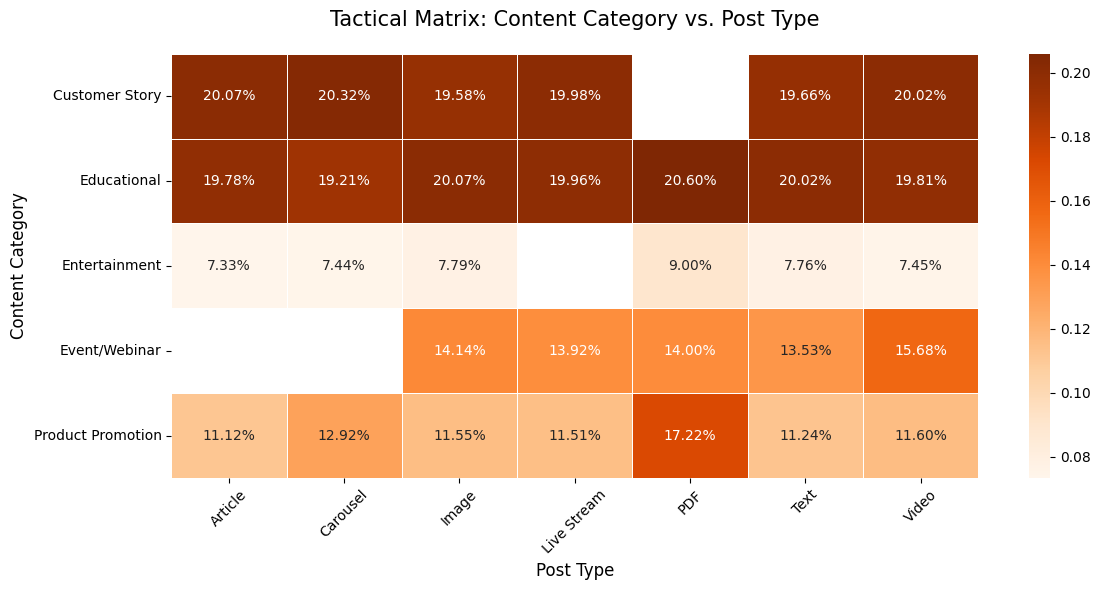

In [7]:

pivot_cat_type = df.pivot_table(index='Content_Category', columns='Post_Type', values='Engagement_Rate', aggfunc='mean')


plt.figure(figsize=(12, 6))
sns.heatmap(pivot_cat_type, annot=True, cmap='Oranges', fmt='.2%', linewidths=.5)
plt.title('Tactical Matrix: Content Category vs. Post Type', fontsize=15, pad=20)
plt.xlabel('Post Type', fontsize=12)
plt.ylabel('Content Category', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 💡 Insight: Video for Education, Images for Entertainment
- **Finding:** The **PDF** format paired with **'Educational'** content achieves the highest performance. Also, **'Entertainment' and 'Product Promotion'** content sees engagement spikes when utilizing **PDF** formats.
- **Action:** 
Focus on creating more **PDF** content for **'Educational'** posts to maximize engagement.
Leverage **PDF** format for **'Entertainment'** and **'Product Promotion'** content to boost audience interaction.
Align content strategy by matching content types with their most effective format for higher overall performance.

## Conclusion & Strategic Recommendations

Based on the data analysis, the following strategic shifts are recommendations

1.  **Diversify Content Mix:** While 'Educational' content is a safe baseline, experimenting with higher **'Entertainment'** ratios in Western markets (USA/Canada) could unlock new audience segments.
2.  **Metric-Driven Goals:** Separate campaigns into **"Growth"** (Maximize Views/Impressions) and **"Nurture"** (Maximize Engagement Rate/Comments) to avoid conflicting KPI targets.
3.  **Regional Tailoring:** Move away from a "One Size Fits All" content calendar. Specifically, increase interactive event content for the South American and South Asian markets.